<a href="https://colab.research.google.com/github/homosapienssapiens/UFC-fights-prediction/blob/main/ufc_win_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre

Data visualization
---
I will load and explore the dataset.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/IDI II/Final project/Ultimate UFC Dataset/ufc-master.csv')
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Ciryl Gane,Alexander Volkov,-155,125,64.516129,125.0,6/26/2021,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,5,0,2,0,4.88,0.59,0.2,0.66,0.70,4,2,28,0,0,1,2,4,0,0,7,Orthodox,200.66,203.20,250,0,5,0,5.04,0.55,0.5,1.13,0.26,5,0,14,0,0,0,2,1,2,0,5,Orthodox,193.04,205.74,245,31,32,0,-3,-1,2,2,14,0,3,-2,7.62,-2.54,1,-0.16,-0.3,-0.47,1,1,5.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,300.0,700.0,375.0,275.0,1600.0
1,Tanner Boser,Ovince Saint Preux,-195,153,51.282051,153.0,6/26/2021,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,1,0,0,2.68,0.46,0.6,1.19,0.40,5,11,69,1,1,0,4,9,5,0,19,Southpaw,190.50,203.20,205,2,0,0,4.21,0.52,0.0,0.00,0.00,2,3,15,0,0,0,1,2,0,0,3,Orthodox,187.96,190.50,255,29,38,-1,0,3,16,8,54,1,7,5,2.54,12.70,9,-1.53,0.6,1.19,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Punch,2.0,2:31,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0,250.0,1800.0,350.0,700.0,500.0
2,Raoni Barcelos,Timur Valiev,-230,180,43.478261,180.0,6/26/2021,"Las Vegas, Nevada, USA",USA,Blue,False,Bantamweight,MALE,3,0,1,0,5.50,0.71,0.0,2.73,0.66,1,0,5,0,0,0,1,0,0,0,1,Orthodox,167.64,170.18,135,0,5,0,5.59,0.52,0.7,2.23,0.56,5,0,13,0,0,0,2,2,1,0,5,Orthodox,170.18,170.18,135,34,31,0,-4,-4,-4,0,-8,0,-2,-1,-2.54,0.00,-3,-0.09,-0.7,0.50,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Let's explore the completeness of the dataset.

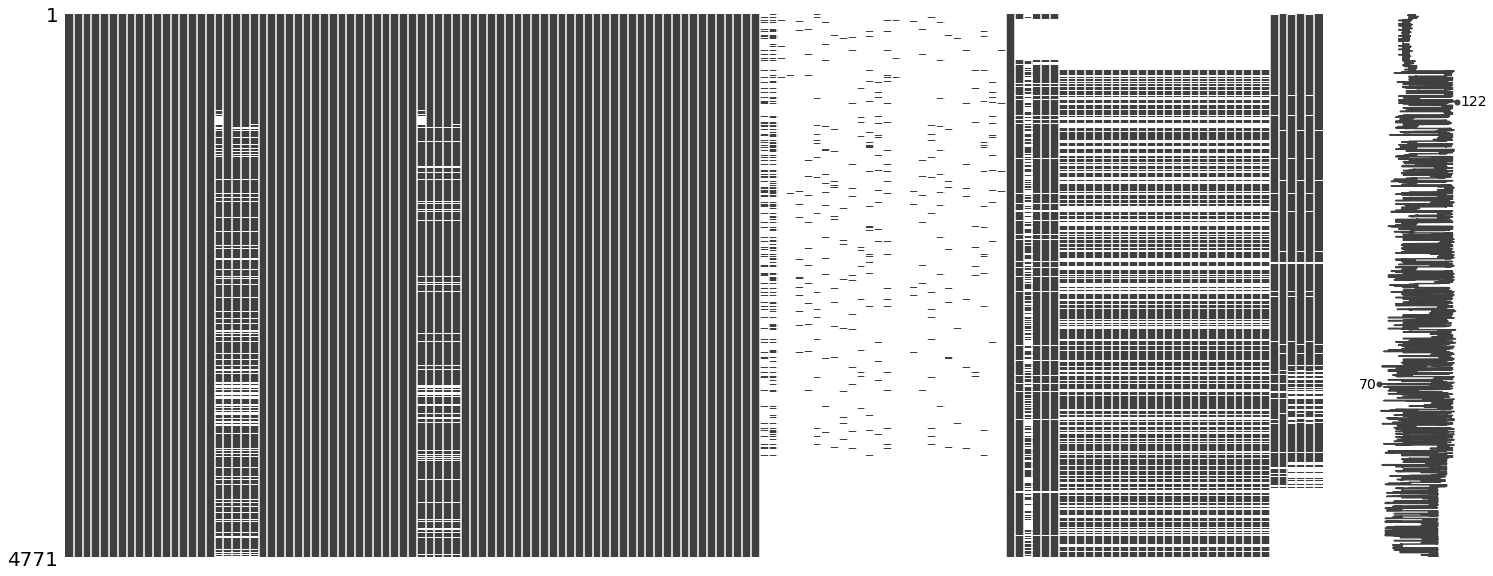

In [ ]:
msno.matrix(df)

Status of the dataset.

In [ ]:
df.describe(include = 'all')

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4771,4771,4771.000000,4771.000000,4771.000000,4771.000000,4771,4771,4771,4771,4771,4771,4771,4771.000000,4771.000000,4771.000000,4771.000000,3841.000000,4006.000000,3939.000000,3938.000000,3929.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4769,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4316.000000,4414.000000,4414.000000,4414.000000,4404.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.0,851.000000,1295.000000,54.000000,7.0,102.000000,114.000000,138.000000,138.000000,130.000000,138.000000,134.000000,131.000000,133.000000,141.000000,162.000000,39.000000,0.0,60.000000,76.000000,106.000000,91.000000,98.000000,87.000000,86.000000,88.000000,83.000000,93.000000,33.000000,4771,4168,2033,4149.000000,4149,4149.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,3969.000000,3953.000000,3723.000000,3711.000000,3723.000000,3710.000000
unique,1323,1565,NaN,NaN,NaN,NaN,417,145,28,2,2,13,2,NaN,NaN,NaN,NaN,NaN,

We'll need the following columns as inputs for our model:
* lose_streak_dif: (Blue lose streak) - (Red lose streak)
* winstreakdif: (Blue win streak) - (Red win streak)
* longest_win_streak_dif: (Blue longest win streak) - (Red longest win streak)
* win_dif: (Blue wins) - (Red wins)
* loss_dif: (Blue losses) - (Red losses)
* total_round_dif: (Blue total rounds fought) - (Red total rounds fought)
* total_title_bout_dif: (Blue number of title fights) - (Red number of title fights)
* ko_dif: (Blue wins by KO/TKO) - (Red wins by KO/TKO)
* sub_dif: (Blue wins by submission) - (Red wins by submission)
* height_dif: (Blue height) - (Red height) in cms
* reach_dif: (Blue reach) - (Red reach) in cms
* age_dif: (Blue age) - (Red age)
* sig_str_dif: (Blue sig strikes per minute) - (Red sig strikes per minute)
* avg_sub_att_dif: (Blue submission attempts) - (Red submission attempts)
* avg_td_dif: (Blue TD attempts) - (Red TD attempts)

I choose this 15 variables because they have the difference between the red fighter and the blue fighter in several aspects.

In [ ]:
df.columns.get_loc('lose_streak_dif')

62

In [ ]:
filtereddf = df.iloc[:, 62:77]
filtereddf.head()

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif
0,0,-3,-1,2,2,14,0,3,-2,7.62,-2.54,1,-0.16,-0.3,-0.47
1,-1,0,3,16,8,54,1,7,5,2.54,12.70,9,-1.53,0.6,1.19
2,0,-4,-4,-4,0,-8,0,-2,-1,-2.54,0.00,-3,-0.09,-0.7,0.50
3,0,0,-2,-10,-7,-32,0,-5,-2,-7.62,-2.54,-1,-1.96,-0.2,0.53
4,0,0,-3,-6,-3,-17,0,0,-3,5.08,12.70,1,-3.57,-0.6,-1.28


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bc4f18910>,
      dtype=object)

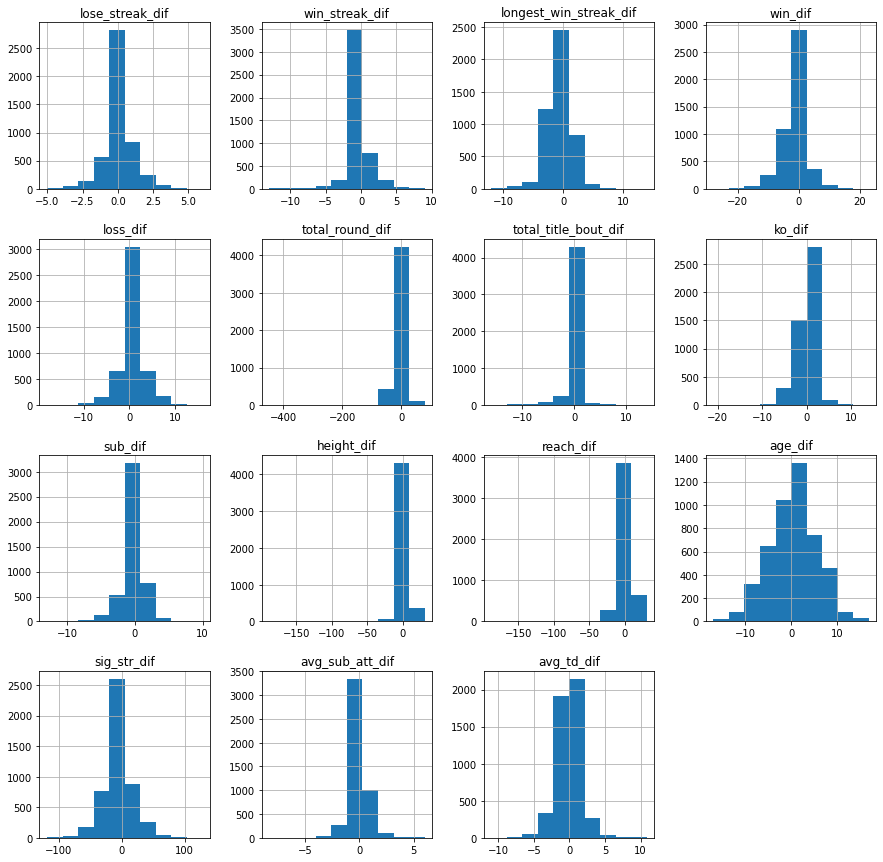

In [ ]:
filtereddf.hist(figsize = (15, 15))

For the result we'll need the winner of each match.

In [ ]:
filtereddf['Winner'] = pd.DataFrame(df['Winner'])
filtereddf.head()

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,Winner
0,0,-3,-1,2,2,14,0,3,-2,7.62,-2.54,1,-0.16,-0.3,-0.47,Red
1,-1,0,3,16,8,54,1,7,5,2.54,12.70,9,-1.53,0.6,1.19,Red
2,0,-4,-4,-4,0,-8,0,-2,-1,-2.54,0.00,-3,-0.09,-0.7,0.50,Blue
3,0,0,-2,-10,-7,-32,0,-5,-2,-7.62,-2.54,-1,-1.96,-0.2,0.53,Red
4,0,0,-3,-6,-3,-17,0,0,-3,5.08,12.70,1,-3.57,-0.6,-1.28,Red


In [ ]:
filtereddf.describe()

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif
count,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000
mean,0.111507,-0.175435,-0.767344,-1.405575,0.400755,-5.191784,-0.324879,-0.498218,-0.277510,0.025466,-0.249235,0.364494,-3.623030,-0.066192,-0.202840
std,0.991650,1.733150,2.032532,4.030757,2.850862,16.939178,1.651658,2.077772,1.763036,6.981425,9.459687,5.167735,22.806158,0.844674,1.688931
min,-5.000000,-13.000000,-12.000000,-28.000000,-18.000000,-448.000000,-16.000000,-21.000000,-13.000000,-187.960000,-187.960000,-17.000000,-118.000000,-8.300000,-11.000000
25%,0.000000,-1.000000,-2.000000,-3.000000,-1.000000,-12.000000,0.000000,-1.000000,-1.000000,-5.080000,-5.080000,-3.000000,-15.250000,-0.428571,-1.000000
50%,0.000000,0.000000,-1.000000,-1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.780000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,5.080000,5.080000,4.000000,5.272857,0.227922,0.590455
max,6.000000,9.000000,14.000000,23.000000,16.000000,80.000000,14.000000,14.000000,10.000000,30.480000,30.480000,17.000000,128.222222,6.000000,10.860000


In [ ]:
filtereddf.head()

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,Winner
0,0,-3,-1,2,2,14,0,3,-2,7.62,-2.54,1,-0.16,-0.3,-0.47,Red
1,-1,0,3,16,8,54,1,7,5,2.54,12.70,9,-1.53,0.6,1.19,Red
2,0,-4,-4,-4,0,-8,0,-2,-1,-2.54,0.00,-3,-0.09,-0.7,0.50,Blue
3,0,0,-2,-10,-7,-32,0,-5,-2,-7.62,-2.54,-1,-1.96,-0.2,0.53,Red
4,0,0,-3,-6,-3,-17,0,0,-3,5.08,12.70,1,-3.57,-0.6,-1.28,Red


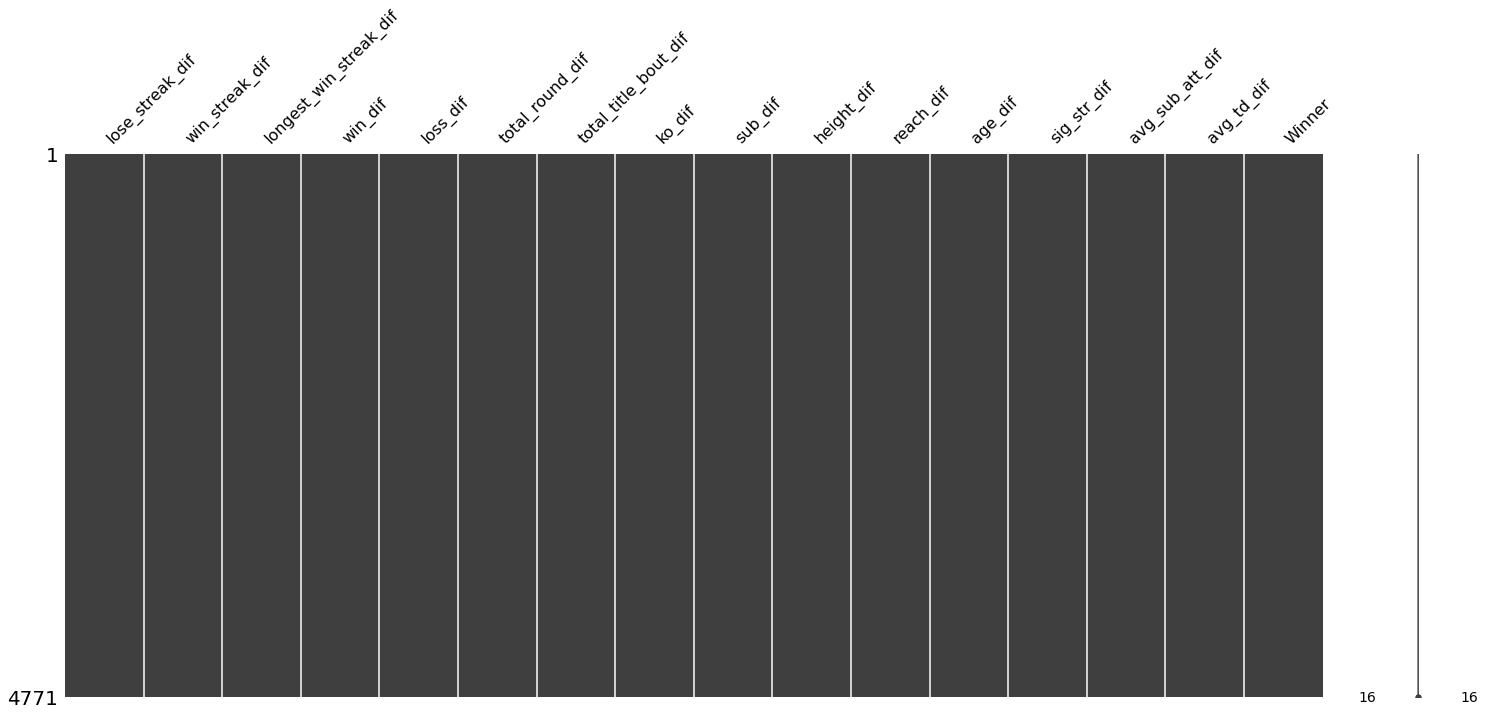

In [ ]:
msno.matrix(filtereddf)

In [ ]:
filtereddf.isnull().values.any()

False

Feature engineering
---
I will change the results dataframe (Winner) from "Red/Blue" to "1/0"

In [ ]:
filtereddf['Winner'] = filtereddf['Winner'].replace('Red', 1)
filtereddf['Winner'] = filtereddf['Winner'].replace('Blue', 0)
filtereddf['Winner'].unique()

array([1, 0])

I will need to separate the matches I will train from the matches I will test accuracy for. I have decided to train 4000 matches and test 771.

In [ ]:
index_rlist = np.random.choice(filtereddf.index, 4000, replace=False)
traindf = filtereddf.loc[index_rlist, :]
testdf = filtereddf.drop(index_rlist)

In [ ]:
traindf.head()

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,Winner
2568,-1,-3,-2,-7,2,-29,0,0,-1,-2.54,2.54,-1,-22.576923,-0.038462,-2.211538,1
3968,0,2,-2,-2,-2,3,0,0,-1,-2.54,-5.08,2,10.923077,0.769231,0.461538,0
4276,0,-4,3,1,-1,8,1,0,-2,-7.62,-25.40,-9,-0.737374,0.060606,-1.131313,1
1134,2,2,-1,-4,3,-22,0,0,0,7.62,7.62,0,-1.111111,0.888889,0.222222,0
3228,0,-2,-4,-6,2,-19,-2,-3,-1,0.00,-5.08,1,-53.375000,-1.375000,-1.500000,1


All the columns for the inputs and results are complete.

Model building
---
I've decided to work with the perceptron milty -layer neural network. The first step is to get all the functions I need for this neural network.

In [ ]:
# Training function (Perceptron)
def learn(X, D, wh, wo, L, a = 0.5, alpha = 0.5, E = 0.0001):
    Y = np.random.random((len(X), 1))
    while True:
        for i in range(L):
            #Forward**********************************************************************
            neth = wh @ X[i]
            yh = 1/(1+np.e**(-a*neth))
            neto = wo @ yh
            Y[i] = 1/(1+np.e**(-a*neto))
            #Backward*********************************************************************
            deltao = (D[i] - Y[i]) * Y[i] * (1 - Y[i])
            deltah = yh * (1 - yh) * (np.transpose(wo) @ deltao)
            wo += np.transpose(np.atleast_2d(alpha * deltao)) @ np.atleast_2d(yh)
            wh += np.transpose(np.atleast_2d(alpha * deltah)) @ np.atleast_2d(X[i])
        print(np.linalg.norm(deltao), end = '\r')
        if np.linalg.norm(deltao) <= E:
            return wh, wo
        
# Function function (Perceptron)   
def funct(X, wh, wo, L, a = 0.5):
    Y = np.random.random((len(X), 1))
    for i in range(len(X)):    
        #Forward**********************************************************************
        neth = wh @ X[i]
        yh = 1/(1+np.e**(-a*neth))
        neto = wo @ yh
        Y[i] = 1/(1+np.e**(-a*neto))
    return Y

### Normalization




In [ ]:
len(filtereddf.columns)

16

In [ ]:
norm_filtereddf = pd.DataFrame(pre.normalize(filtereddf.iloc[:, 0:len(filtereddf.columns)-1], axis = 0))
#norm_filtereddf = filtereddf
norm_filtereddf['Winner'] = filtereddf['Winner'].copy()
norm_filtereddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Winner
0,0.00000,-0.024935,-0.006664,0.006784,0.010059,0.011441,0.000000,0.020329,-0.016225,0.015803,-0.003886,0.002795,-0.000100,-0.005127,-0.004001,1
1,-0.01451,0.000000,0.019993,0.054269,0.040235,0.044131,0.008602,0.047435,0.040563,0.005268,0.019432,0.025154,-0.000959,0.010254,0.010129,1
2,0.00000,-0.033247,-0.026658,-0.013567,0.000000,-0.006538,0.000000,-0.013553,-0.008113,-0.005268,0.000000,-0.008385,-0.000056,-0.011962,0.004256,0
3,0.00000,0.000000,-0.013329,-0.033918,-0.035206,-0.026152,0.000000,-0.033882,-0.016225,-0.015803,-0.003886,-0.002795,-0.001229,-0.003418,0.004511,1
4,0.00000,0.000000,-0.019993,-0.020351,-0.015088,-0.013893,0.000000,0.000000,-0.024338,0.010536,0.019432,0.002795,-0.002238,-0.010254,-0.010895,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bc4e90a10>,
      dtype=object)

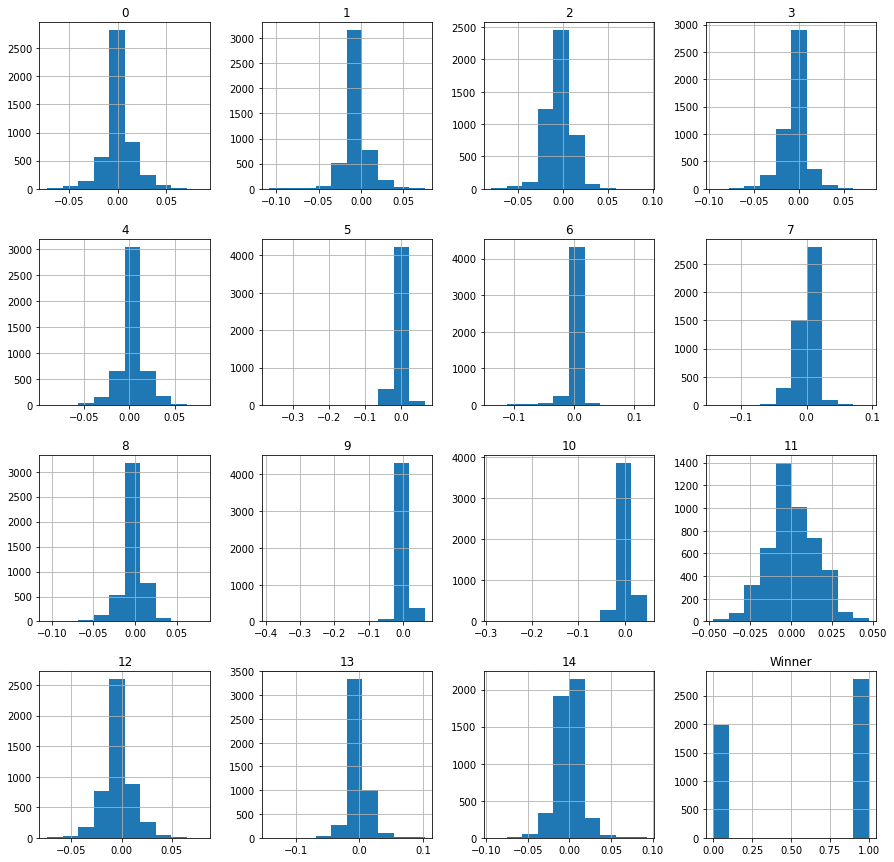

In [ ]:
norm_filtereddf.hist(figsize = (15, 15))

### Perceptron with normalized data (L = 30, a = 0.002, alpha = 1, E = 0.01)

In [ ]:
norm_filtereddf = norm_filtereddf.drop([5, 6, 9 ,10, 0, 1, 4, 8, 13, 3, 7], axis = 1)

In [ ]:
norm_filtereddf.head()

,2,11,12,14,Winner
0,-0.006664,0.002795,-0.000100,-0.004001,1
1,0.019993,0.025154,-0.000959,0.010129,1
2,-0.026658,-0.008385,-0.000056,0.004256,0
3,-0.013329,-0.002795,-0.001229,0.004511,1
4,-0.019993,0.002795,-0.002238,-0.010895,1


In [ ]:
# Weight initialization with random values.
L = 8
wh = np.random.random((L, len(norm_filtereddf.columns)-1))
wo = np.random.random((1, L))

In [ ]:
# Creation of training and testing parts of the dataset.
# The samples are getting in random fashion.
index_rlist = np.random.choice(norm_filtereddf.index, 4000, replace=False)
traindf = norm_filtereddf.loc[index_rlist, :]
testdf = norm_filtereddf.drop(index_rlist)

In [ ]:
X = traindf.drop('Winner', axis = 1).to_numpy()
D = traindf['Winner'].to_numpy()

# Corremos el aprendizaje
lwh, lwo = learn(X, D, wh, wo, L = L, E = 0.001, a = 0.5, alpha = 1)

Text(0.5, 1.0, 'Training df')

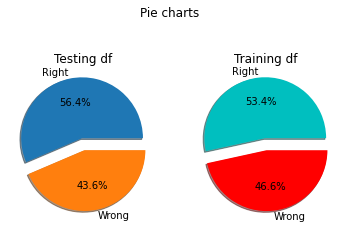

In [ ]:
X = testdf.drop('Winner', axis = 1).to_numpy()
testdf['Y'] = funct(X, lwh, lwo, L = L)
testdf.loc[(testdf['Winner'] == 1) & (testdf['Y'] >= 0.5), 'Result'] = True 
testdf.loc[(testdf['Winner'] == 0) & (testdf['Y'] < 0.5), 'Result'] = True 
testdf.loc[(testdf['Winner'] == 1) & (testdf['Y'] < 0.5), 'Result'] = False 
testdf.loc[(testdf['Winner'] == 0) & (testdf['Y'] >= 0.5), 'Result'] = False
resultest = testdf['Result'].value_counts(normalize=True) * 100

X = traindf.drop('Winner', axis = 1).to_numpy()
traindf['Y'] = funct(X, lwh, lwo, L = L)
traindf.loc[(traindf['Winner'] == 1) & (traindf['Y'] >= 0.5), 'Result'] = True 
traindf.loc[(traindf['Winner'] == 0) & (traindf['Y'] < 0.5), 'Result'] = True 
traindf.loc[(traindf['Winner'] == 1) & (traindf['Y'] < 0.5), 'Result'] = False 
traindf.loc[(traindf['Winner'] == 0) & (traindf['Y'] >= 0.5), 'Result'] = False
resultrain = traindf['Result'].value_counts(normalize=True) * 100



fig, axs = plt.subplots(1, 2)
fig.suptitle('Pie charts')
axs[0].pie(resultest, labels = ['Right', 'Wrong'], shadow = True, explode = (0.1, 0.1), autopct='%1.1f%%')
axs[0].set_title('Testing df')
axs[1].pie(resultrain, labels = ['Right', 'Wrong'], shadow = True, explode = (0.1, 0.1), autopct='%1.1f%%', colors = ['c', 'r'])
axs[1].set_title('Training df')
#traindf = traindf.drop(['Y', 'Result'], axis = 1)
#testdf = testdf.drop(['Y', 'Result'], axis = 1)

In [ ]:
#testdf

In [ ]:
#un = testdf['Y'].unique()
#un

In [ ]:
round(resultest, 2)

False    56.42
True     43.58
Name: Result, dtype: float64

In [ ]:
round(resultrain, 2)

False    53.42
True     46.58
Name: Result, dtype: float64

### UFC 264 - Poirier VS McGregor - Results prediction

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/IDI II/Final project/Ultimate UFC Dataset/upcoming-event.csv')
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Dustin Poirier,Conor McGregor,-139,110,71.942446,110.000000,7/10/2021,"Las Vegas, Nevada, USA",USA,NaN,False,Lightweight,MALE,5,1,0,0,5.32,0.49,0.0,0.70,0.55,7,3,27,4,1,0,1,8,0,0,10,Southpaw,175.26,187.96,155,0,2,0,5.59,0.50,1.3,1.47,0.36,5,6,64,2,1,0,6,10,3,0,20,Southpaw,175.26,182.88,155,32,32,1,-2,2,-10,-3,-37,2,-2,-3,0.00,5.08,0,-0.27,-1.3,-0.77,1,1,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,15.0,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,700,575,1800,170,155
1,Gilbert Burns,Stephen Thompson,130,-162,130.000000,61.728395,7/10/2021,"Las Vegas, Nevada, USA",USA,NaN,False,Welterweight,MALE,3,0,2,1,4.24,0.43,0.0,0.32,0.45,7,4,48,2,0,0,6,5,0,0,11,Orthodox,182.88,190.50,170,1,0,0,3.22,0.45,0.7,2.08,0.35,6,4,39,1,0,0,5,3,4,0,12,Orthodox,177.80,180.34,170,34,38,-1,2,1,-1,0,9,1,2,-4,5.08,10.16,4,1.02,-0.7,-1.76,1,1,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,150,475,2500,525,250
2,Tai Tuivasa,Greg Hardy,-137,110,72.992701,110.000000,7/10/2021,"Las Vegas, Nevada, USA",USA,NaN,False,Heavyweight,MALE,3,1,0,0,4.83,0.50,0.0,0.21,0.33,2,3,19,0,0,0,1,5,0,0,6,Orthodox,195.58,203.20,265,0,2,0,4.38,0.50,0.0,0.00,0.00,3,3,14,0,0,0,1,4,0,0,5,Southpaw,187.96,190.50,264,28,32,1,-2,-1,1,0,5,0,1,0,7.62,12.70,4,0.45,0.0,0.21,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.columns.get_loc('lose_streak_dif')

62

In [ ]:
filtereddf = df.iloc[:, 62:77]
filtereddf

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif
0,1,-2,2,-10,-3,-37,2,-2,-3,0.00,5.08,0,-0.27,-1.3,-0.77
1,-1,2,1,-1,0,9,1,2,-4,5.08,10.16,4,1.02,-0.7,-1.76
2,1,-2,-1,1,0,5,0,1,0,7.62,12.70,4,0.45,0.0,0.21
3,-1,2,-1,-1,-2,-11,1,-1,-1,-7.62,0.00,-2,-1.30,0.1,1.39
4,0,-1,-5,-6,-1,-13,0,-4,0,-10.16,-10.16,2,-6.31,-0.8,-0.79
5,0,0,-3,-9,-4,-34,-3,-3,-4,-7.62,2.54,-2,0.51,-0.5,1.08
6,-1,2,0,-3,-2,-8,0,-3,-1,2.54,-7.62,-4,-1.59,-0.4,0.87
7,0,-2,-2,-2,0,-6,0,1,-1,-7.62,-2.54,-12,0.18,3.3,3.94
8,0,-2,-2,-4,-2,-19,0,-2,0,2.54,5.08,-1,4.46,-0.3,-1.37
9,1,0,1,2,5,24,0,1,-1,5.08,5.08,2,0.42,0.3,0.11


In [ ]:
#filtereddf = filtereddf.drop(['total_round_dif'], axis = 1)

In [ ]:
filtereddf.isnull().values.any()

False

In [ ]:
norm_filtereddf = pd.DataFrame(pre.normalize(filtereddf, axis = 0))
#norm_filtereddf = filtereddf
norm_filtereddf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.377964,-0.371391,0.26968,-0.608581,-0.363803,-0.567087,0.516398,-0.282843,-0.442326,0.000000,0.181818,0.000000,-0.029781,-0.336896,-0.139124
1,-0.377964,0.371391,0.13484,-0.060858,0.000000,0.137940,0.258199,0.282843,-0.589768,0.179605,0.363636,0.233285,0.112507,-0.181406,-0.317997
2,0.377964,-0.371391,-0.13484,0.060858,0.000000,0.076633,0.000000,0.141421,0.000000,0.269408,0.454545,0.233285,0.049635,0.000000,0.037943
3,-0.377964,0.371391,-0.13484,-0.060858,-0.242536,-0.168594,0.258199,-0.141421,-0.147442,-0.269408,0.000000,-0.116642,-0.143391,0.025915,0.251145
4,0.000000,-0.185695,-0.67420,-0.365148,-0.121268,-0.199247,0.000000,-0.565685,0.000000,-0.359211,-0.363636,0.116642,-0.695997,-0.207321,-0.142737
5,0.000000,0.000000,-0.40452,-0.547723,-0.485071,-0.521107,-0.774597,-0.424264,-0.589768,-0.269408,0.090909,-0.116642,0.056253,-0.129575,0.195134
6,-0.377964,0.371391,0.00000,-0.182574,-0.242536,-0.122613,0.000000,-0.424264,-0.147442,0.089803,-0.272727,-0.233285,-0.175378,-0.103660,0.157192
7,0.000000,-0.371391,-0.26968,-0.121716,0.000000,-0.091960,0.000000,0.141421,-0.147442,-0.269408,-0.090909,-0.699854,0.019854,0.855198,0.711879
8,0.000000,-0.371391,-0.26968,-0.243432,-0.242536,-0.291207,0.000000,-0.282843,0.000000,0.089803,0.181818,-0.058321,0.491941,-0.077745,-0.247532
9,0.377964,0.000000,0.13484,0.121716,0.606339,0.367840,0.000000,0.141421,-0.147442,0.179605,0.181818,0.116642,0.046326,0.077745,0.019875


In [ ]:
norm_filtereddf = norm_filtereddf.drop([5, 6, 9 ,10, 0, 1, 4, 8, 13, 3, 7], axis = 1)

In [ ]:
X = norm_filtereddf.to_numpy()
norm_filtereddf['Winner_predict'] = funct(X, lwh, lwo, L = L)

In [ ]:
norm_filtereddf['Winner_predict']

0     9.999765e-01
1     9.974815e-01
2     2.811833e-05
3     6.477077e-03
4     9.999995e-01
5     1.476712e-07
6     9.948131e-01
7     2.366701e-08
8     3.594602e-08
9     8.348678e-02
10    9.999950e-01
11    9.999989e-01
12    9.999991e-01
Name: Winner_predict, dtype: float64

In [ ]:
most_recent = pd.read_csv('/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/IDI II/Final project/Ultimate UFC Dataset/most-recent-event.csv')
most_recent['Winner']

0      Red
1      Red
2      Red
3      Red
4      Red
5     Blue
6     Blue
7     Blue
8     Blue
9      Red
10    Blue
11     Red
Name: Winner, dtype: object

In [ ]:
final_results = pd.DataFrame()
final_results = df[['R_fighter', 'B_fighter']]
final_results = final_results.join(round(norm_filtereddf['Winner_predict'], 2))
final_results = final_results.join(most_recent['Winner'])
#final_results = final_results.drop(12)  
final_results.loc[(final_results['Winner_predict'] >= 0.5) & (final_results['Winner'] == 'Red'), 'Result'] = True 
final_results.loc[(final_results['Winner_predict'] < 0.5) & (final_results['Winner'] == 'Red'), 'Result'] = False 
final_results.loc[(final_results['Winner_predict'] >= 0.5) & (final_results['Winner'] == 'Blue'), 'Result'] = False
final_results.loc[(final_results['Winner_predict'] < 0.5) & (final_results['Winner'] == 'Blue'), 'Result'] = True
final_results

,R_fighter,B_fighter,Winner_predict,Winner,Result
0,Dustin Poirier,Conor McGregor,1.00,Red,True
1,Gilbert Burns,Stephen Thompson,1.00,Red,True
2,Tai Tuivasa,Greg Hardy,0.00,Red,False
3,Irene Aldana,Yana Kunitskaya,0.01,Red,False
4,Sean O'Malley,Kris Moutinho,1.00,Red,True
5,Carlos Condit,Max Griffin,0.00,Blue,True
6,Niko Price,Michel Pereira,0.99,Blue,False
7,Ryan Hall,Ilia Topuria,0.00,Blue,True
8,Trevin Giles,Dricus Du Plessis,0.00,Blue,True
9,Jennifer Maia,Jessica Eye,0.08,Red,False


([<matplotlib.patches.Wedge at 0x7f8bc3c55310>,
 [Text(-0.3105827817738221, 1.15911101093279, 'Right'),
  Text(0.3105827817738217, -1.15911101093279, 'Wrong')],
 [Text(-0.18117328936806287, 0.6761480897107942, '58.3%'),
  Text(0.18117328936806262, -0.6761480897107942, '41.7%')])

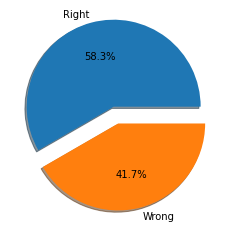

In [ ]:
result = final_results['Result'].value_counts(normalize=True) * 100
plt.pie(result, labels = ['Right', 'Wrong'], shadow = True, explode = (0.1, 0.1), autopct='%1.1f%%')

In [ ]:
result

True     58.333333
False    41.666667
Name: Result, dtype: float64